In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from RAVEN.pe.appr_taylor_utils import *
import matplotlib.pyplot as plt

# Test for Appr_Taylor

In [38]:
a = torch.arange(0, 1, 0.001).cuda()
a_int = a.floor()

precise = torch.exp(a)

point = torch.tensor(0.)
scale = torch.exp(a_int + point)
const = torch.tensor(1.0)
input = a - point

coeff = [1/1, 1/2, 1/4, 1/8, 1/16, 1/32]
power = [1  ,   2,   3,   4,    5,    5]
sign  = [1  ,   1,   1,  -1,    1,    1]

approximate = Appr_Taylor(scale, 
                          const, 
                          input, 
                          coeff, 
                          power, 
                          sign, 
                          fxp=True, 
                          intwidth=7, 
                          fracwidth=8, 
                          rounding="round", 
                          keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

min error rate: tensor(-0.0043, device='cuda:0')
max error rate: tensor(0.0060, device='cuda:0')
avg error rate: tensor(0.0007, device='cuda:0')
rms error rate: tensor(0.0018, device='cuda:0')


# exp parameter generation

1. exp_data_gen test

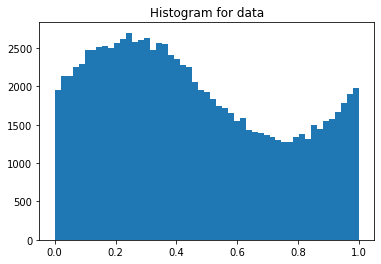

In [5]:
data = exp_data_gen("left")
fig = plt.hist(data.cpu().numpy(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for data")
plt.show()

2. exp_param_gen test

In [2]:
exp_param_gen(distribution="uniform", intwidth=7, fracwidth=8, rounding="floor", keepwidth=True, valid=True)

Approximate Taylor series at point: 0.0
final coeff [1.0, 0.5, 0.25, 0.03125, 0.0078125]
final power [1, 2, 3, 3, 4]
final sign [1, 1, 1, -1, 1]
min error: ['-0.26567', '-0.08461', '-0.00768', '-0.00768', '-0.00768']
max error: ['-0.00001', '-0.00001', '0.01154', '0.00410', '0.00442']
avg error: ['-0.10447', '-0.02626', '0.00118', '-0.00151', '-0.00123']
rms error: ['0.13226', '0.03525', '0.00453', '0.00256', '0.00250']

Approximate Taylor series at point: 0.125
final coeff [1.0, 0.5, 0.25, 0.03125, 0.0078125]
final power [1, 2, 3, 3, 4]
final sign [1, 1, 1, -1, 1]
min error: ['-0.22024', '-0.06396', '-0.00824', '-0.00807', '-0.00807']
max error: ['-0.00030', '0.00005', '0.00939', '0.00379', '0.00448']
avg error: ['-0.07509', '-0.01802', '-0.00051', '-0.00205', '-0.00192']
rms error: ['0.10115', '0.02472', '0.00389', '0.00298', '0.00297']

Approximate Taylor series at point: 0.25
final coeff [1.0, 0.5, 0.25, 0.03125, 0.03125, 0.015625]
final power [1, 2, 3, 3, 4, 4]
final sign [1, 1, 1

# div paprameter generation

1. div_data_gen test

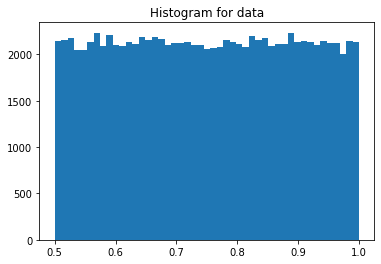

In [16]:
data = div_data_gen("uniform")
fig = plt.hist(data.cpu().numpy(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for data")
plt.show()

2. div_param_gen test

In [17]:
div_param_gen(distribution="right", intwidth=7, fracwidth=8, rounding="floor", keepwidth=True, valid=True)

Approximate Taylor series at point: 1.0
final coeff [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
final power [1, 2, 3, 4, 5, 6, 7]
final sign [-1, 1, -1, 1, -1, 1, -1]
min error: ['-0.25000', '-0.12500', '-0.06250', '-0.03125', '-0.01579', '-0.00852', '-0.00505']
max error: ['0.00389', '0.00390', '0.00390', '0.00455', '0.00523', '0.00616', '0.00621']
avg error: ['-0.06891', '-0.02495', '-0.00952', '-0.00320', '-0.00099', '0.00030', '0.00069']
rms error: ['0.10054', '0.04243', '0.01862', '0.00798', '0.00370', '0.00223', '0.00201']



# log parameter generation

1. log_data_gen test

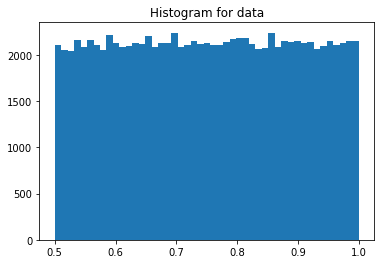

In [2]:
data = log_data_gen("uniform")
fig = plt.hist(data.cpu().numpy(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for data")
plt.show()

2. log_param_gen test

In [3]:
log_param_gen(distribution="left", intwidth=7, fracwidth=8, rounding="floor", keepwidth=True, valid=False)

tensor([-0.2922, -0.2112, -0.0194,  ..., -0.1752, -0.6778, -0.0743])
tensor([1.]) tensor([0.])
Approximate Taylor series at point: 1.0
final coeff [1.0, 0.5, 0.25, 0.25, 0.25, 0.125, 0.015625]
final power [1, 2, 3, 4, 5, 6, 6]
final sign [1, -1, 1, -1, 1, -1, -1]
min error: ['-0.27865', '-0.09831', '-0.05322', '-0.03068', '-0.02015', '-0.01639', '-0.01639']
max error: ['681.66473', '1364.32947', '1364.32947', '1364.32947', '1364.32947', '1364.32947', '1364.32947']
avg error: ['-0.07589', '0.12576', '0.14394', '0.15212', '0.15426', '0.15576', '0.15576']
rms error: ['3.32324', '6.65636', '6.65628', '6.65626', '6.65626', '6.65626', '6.65626']



In [36]:
x = torch.tensor([0.56])
((x-1) - (x-1)**2 / 2 + (x-1)**3 / 3 - (x-1)**4 / 4 + (x-1)**5 / 5 - (x-1)**6 / 6 - (x-1)**7 / 7  + (x-1)**8 / 8) / torch.log(x) - 1

tensor([-0.0252])

In [10]:
a = a+1

In [3]:
1/256

0.00390625

In [37]:
coeff = [1/1, 1/2, 1/4, 1/4, 1/4, 1/8]
power = [  1,   2,   3,   4,   5,   6]
sign  = [  1,  -1,   1,  -1,   1,  -1]
scale = torch.Tensor([1.0])
const = torch.Tensor([1.0])
var   = torch.Tensor([0.5]) - 1.
appr_result = Appr_Taylor(scale,
                          const, 
                          var, 
                          coeff, 
                          power, 
                          sign, 
                          fxp=False, 
                          intwidth=7, 
                          fracwidth=8, 
                          rounding="round", 
                          keepwidth=True)
ref_result = torch.log(torch.Tensor([0.5]))
print((appr_result - ref_result) / ref_result)

tensor([-1.4593])
